## Prácticas Naive Bayes y KNN (ejercicio 3)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link), crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### **3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.**

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### 5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos


In [1]:
import pandas as pd

df_wine = pd.read_csv("data/winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Comprobación tipo de datos y nulos


In [2]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
total_nulls = df_wine.isnull().sum()
total_nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. Comprobación variables correlacionadas


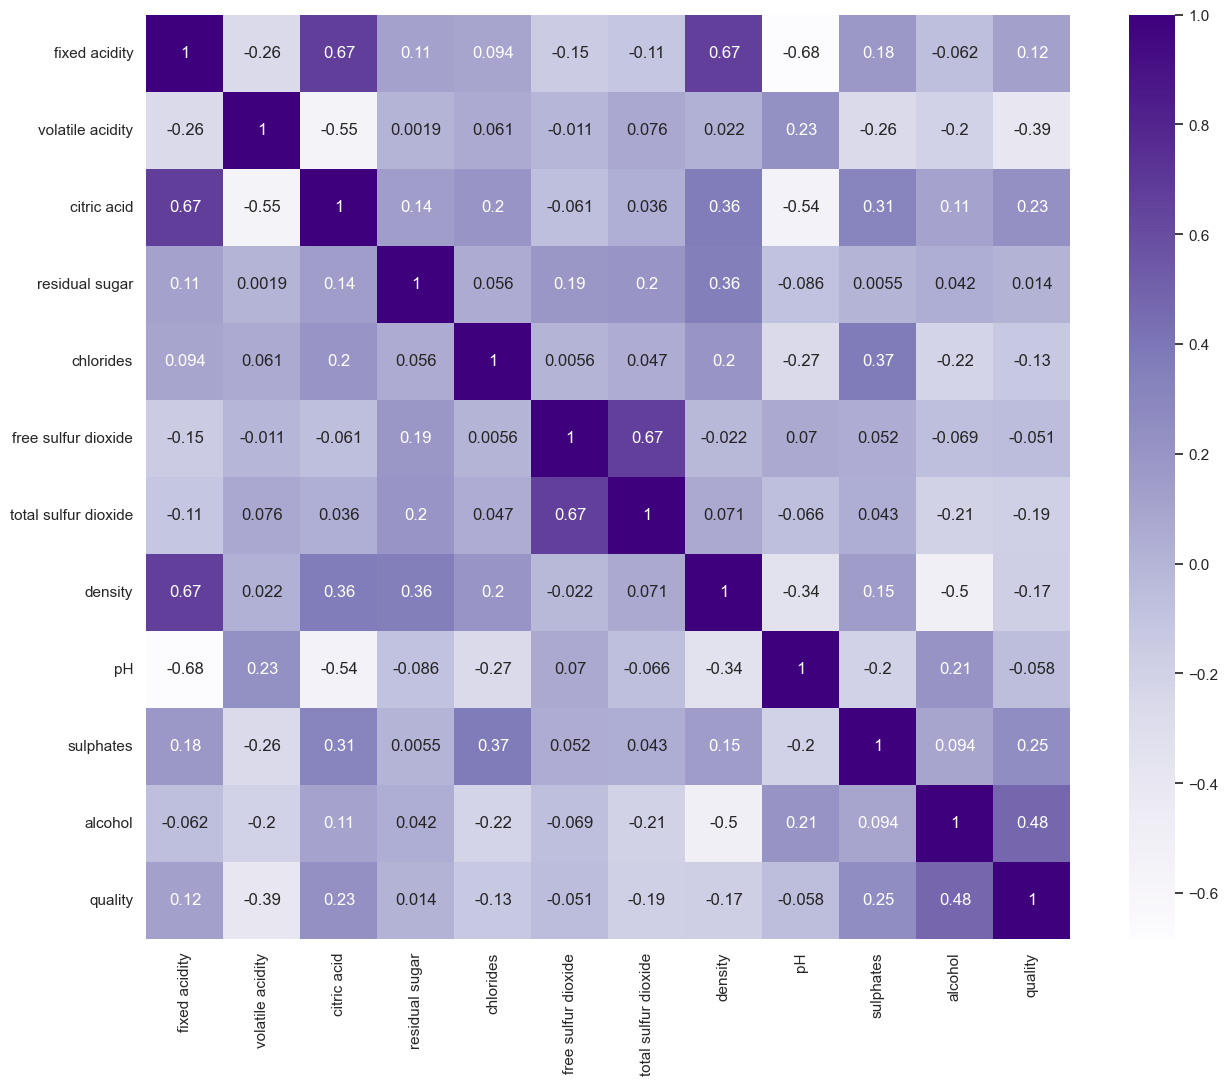

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

# Agranda el dibujo
fig, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(df_wine.corr(), square=True, annot=True, cmap='Purples', ax=ax)

# Mostrar el gráfico
plt.show()

### 4. Preparación de datos


In [5]:
# Lista con nombre de columnas
column_names = df_wine.columns[:]  # 11 columnas + columna 'target'
len(column_names)

12

In [6]:
# Guarda todas menos target
column_names = df_wine.columns[:11]

# Genera una lista de nombres de columnas con el patrón 'quality_i'
new_column_names = [f"quality_{i+1}" for i in range(len(column_names))]

# Crea un diccionario de mapeo de nombres de columnas
column_mapping = dict(zip(column_names, new_column_names))

# Renombra las columnas utilizando el diccionario de mapeo
df_wine.rename(columns=column_mapping, inplace=True)
df_wine.rename(columns={'quality': 'target'}, inplace=True)

# Muestra el DataFrame con los nombres de columnas actualizados
print(df_wine.head())

   quality_1  quality_2  quality_3  quality_4  quality_5  quality_6  \
0        7.4       0.70       0.00        1.9      0.076       11.0   
1        7.8       0.88       0.00        2.6      0.098       25.0   
2        7.8       0.76       0.04        2.3      0.092       15.0   
3       11.2       0.28       0.56        1.9      0.075       17.0   
4        7.4       0.70       0.00        1.9      0.076       11.0   

   quality_7  quality_8  quality_9  quality_10  quality_11  target  
0       34.0     0.9978       3.51        0.56         9.4       5  
1       67.0     0.9968       3.20        0.68         9.8       5  
2       54.0     0.9970       3.26        0.65         9.8       5  
3       60.0     0.9980       3.16        0.58         9.8       6  
4       34.0     0.9978       3.51        0.56         9.4       5  


In [7]:
from sklearn.model_selection import train_test_split

# df.iloc[filas, columnas] para seleccionar columnas con índices
X = df_wine.iloc[:, :11]
X.reset_index(inplace=True)
y = df_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,index,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
754,754,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1
153,153,7.5,0.60,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1
1483,1483,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7
940,940,9.6,0.33,0.52,2.2,0.074,13.0,25.0,0.99509,3.36,0.76,12.4
1543,1543,11.1,0.44,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1351,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
861,861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5
662,662,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6
1174,1174,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5


### 5. Clasificador Naive Bayes GB


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Two ways of predicting precission
score = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the model's accuracy
print(f"GaussianNB => Precisión con 'score': {score:.2f}")
print(f"GaussianNB => Precisión con 'accuracy': {accuracy:.2f}")

GaussianNB => Precisión con 'score': 0.52
GaussianNB => Precisión con 'accuracy': 0.52


### 6. Clasificador KNN


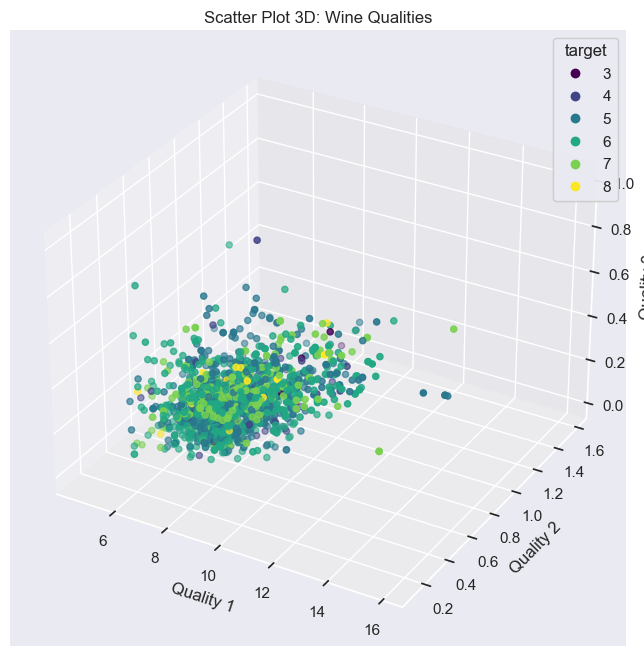

In [9]:
# Visualización de los datos para la elección del método de clasificación
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión 3D
scatter = ax.scatter(df_wine['quality_1'], df_wine['quality_2'], df_wine['quality_3'], c=df_wine['target'], cmap='viridis')

# Configuración de etiquetas y título
ax.set_xlabel('Quality 1')
ax.set_ylabel('Quality 2')
ax.set_zlabel('Quality 3')
plt.title('Scatter Plot 3D: Wine Qualities')

# Leyenda basada en el color de las clases
legend = ax.legend(*scatter.legend_elements(), title='target')
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

Max Value uniform : 0.543416648554662 (1)
Max Value distance : 0.6013084112149534 (14)


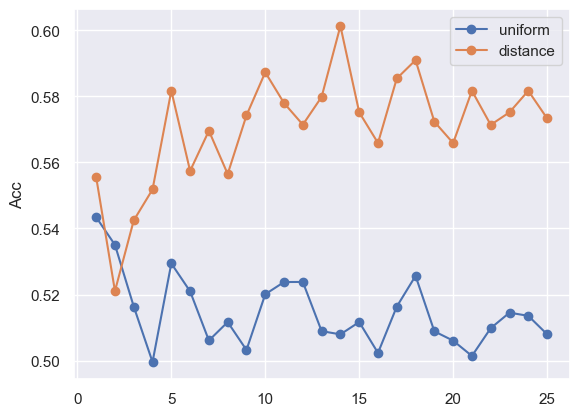

In [10]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

MIN_NEIGHBOR = 1
MAX_NEIGHBOR = 26

cv = KFold(n_splits=5, shuffle=True)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']):

    total_scores = []

    for n_neighbors in range(MIN_NEIGHBOR, MAX_NEIGHBOR):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]

            # Entrenamiento y ejecución del modelo
            knn.fit(X=f_train.drop(['target'], axis=1), y=f_train['target'])
            y_pred = knn.predict(X=f_test.drop(['target'], axis=1))

            # Evaluación del modelo
            acc = accuracy_score(f_test['target'], y_pred)
            fold_accuracy.append(acc)

        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

    plt.plot(range(1, len(total_scores) + 1),
             total_scores, marker='o', label=weights)

    print('Max Value ' + weights + " : " + str(max(total_scores)) +
          " (" + str(np.argmax(total_scores) + 1) + ")")

plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
# En las predicciones, los vecinos más cercanos tendrán un peso inversamente proporcional a su distancia.

# Configuración de hiperparámetros
n_neighbors = 3  # Cuanto menos vecinos, más generaliza
weights = 'distance'

# Configuración del clasificador KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

# Entrenamiento del clasificador KNN
knn.fit(X=X_train, y=y_train)

# Predicción de los datos de test
y_pred = knn.predict(X=X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(
    f'La precisión del modelo KNN con {n_neighbors} vecinos y pesos "{weights}" es: {acc:.4f}')

La precisión del modelo KNN con 3 vecinos y pesos "distance" es: 0.6121


### 7. Matriz de Confusión


In [12]:
df_wine.target.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

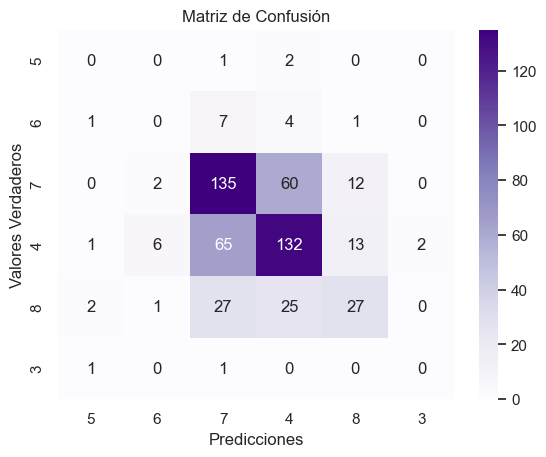

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Purples',
            xticklabels=df_wine.target.unique(), yticklabels=df_wine.target.unique(), fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

### Conclusión

La clasificación es un modelo adecuado para esta conjunto de datos
